<a href="https://colab.research.google.com/github/IT21049972/EmailArmour/blob/main/Spam_massage_LSTM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download("stopwords")


from nltk.corpus import stopwords
from nltk.stem.porter import *
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Email Armor/Datasets/Function 01/spam.csv", encoding="ISO-8859-1")
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)
print(df["v1"].value_counts())
df.head()

v1
ham     4825
spam     747
Name: count, dtype: int64


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.isnull().sum()
df.isna()
df.dropna(axis=1,inplace=True)
print(df["v1"].value_counts())

v1
ham     4825
spam     747
Name: count, dtype: int64


In [ ]:
def pre_text(tweet):
    ''' Convert tweet text into a sequence of words '''

    # convert to lowercase
    text = tweet.lower()
    # remove non letters
    #text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # tokenize
    words = text.split()
    # remove stopwords
    words = [w for w in words if w not in stopwords.words("english")]
    # apply stemming
    words = [PorterStemmer().stem(w) for w in words]
    # return list

    final_text=' '.join(words)
    return final_text

print("\nOriginal tweet ->", df['v2'][12])
print("\nProcessed tweet ->", pre_text(df['v2'][12]))


Original tweet -> URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18

Processed tweet -> urgent! 1 week free membership å£100,000 prize jackpot! txt word: claim no: 81010 t&c www.dbuk.net lccltd pobox 4403ldnw1a7rw18


In [ ]:
# Apply data processing to each tweet
pre_text_list = list(map(pre_text, df['v2']))

In [ ]:
print(pre_text_list)

['go jurong point, crazy.. avail bugi n great world la e buffet... cine got amor wat...', 'ok lar... joke wif u oni...', "free entri 2 wkli comp win fa cup final tkt 21st may 2005. text fa 87121 receiv entri question(std txt rate)t&c' appli 08452810075over18'", 'u dun say earli hor... u c alreadi say...', 'nah think goe usf, live around though', "freemsg hey darl 3 week' word back! i'd like fun still? tb ok! xxx std chg send, å£1.50 rcv", 'even brother like speak me. treat like aid patent.', "per request 'mell mell (oru minnaminungint nurungu vettam)' set callertun callers. press *9 copi friend callertun", 'winner!! valu network custom select receivea å£900 prize reward! claim call 09061701461. claim code kl341. valid 12 hour only.', 'mobil 11 month more? u r entitl updat latest colour mobil camera free! call mobil updat co free 08002986030', "i'm gonna home soon want talk stuff anymor tonight, k? i'v cri enough today.", 'six chanc win cash! 100 20,000 pound txt> csh11 send 87575. cost

In [ ]:
y = pd.get_dummies(df['v1'])
print(y)

        ham   spam
0      True  False
1      True  False
2     False   True
3      True  False
4      True  False
...     ...    ...
5567  False   True
5568   True  False
5569   True  False
5570   True  False
5571   True  False

[5572 rows x 2 columns]


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 10000
max_len=100

def tokenize_pad_sequences(text):
    '''
    This function tokenize the input text into sequnences of intergers and then
    pad each sequence to the same length
    '''
    # Text tokenization
    tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
    tokenizer.fit_on_texts(text)
    # Transforms text to a sequence of integers
    X = tokenizer.texts_to_sequences(text)
    # Pad sequences to the same length
    X = pad_sequences(X, padding='post', maxlen=max_len)
    # return sequences
    return X, tokenizer

print('Before preProcessing \n', df['v2'][12])
print('Before Tokenization & Padding \n', pre_text_list[12])
X, tokenizer = tokenize_pad_sequences(pre_text_list)
#X, tokenizer = tokenize_pad_sequences(df['v2'])
print('After Tokenization & Padding \n', X[12])

Before preProcessing 
 URGENT! You have won a 1 week FREE membership in our å£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18
Before Tokenization & Padding 
 urgent! 1 week free membership å£100,000 prize jackpot! txt word: claim no: 81010 t&c www.dbuk.net lccltd pobox 4403ldnw1a7rw18
After Tokenization & Padding 
 [ 134   70   56   13 1796  425  361   89 2791   28  188   75   79 2792
  150   55   87 2793  445 2794  605 2795    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [ ]:
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 8425 unique tokens.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3342, 100)
(3342, 2)
(1115, 100)
(1115, 2)


In [ ]:
#saev the tokenizer
import pickle

# saving
with open('tokenizer_spam.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('tokenizer_spam.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout,BatchNormalization
from keras.metrics import Precision, Recall
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras import datasets

from keras.callbacks import LearningRateScheduler
from keras.callbacks import History

from keras import losses

from tensorflow.keras.optimizers import legacy as legacy_optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
vocab_size = 10000
embedding_size = 64
epochs=15
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

#sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
sgd = legacy_optimizers.SGD(lr=learning_rate, momentum=momentum, nesterov=False)
# Build model
model= Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_len))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           640000    
                                                                 
 conv1d (Conv1D)             (None, 100, 32)           6176      
                                                                 
 max_pooling1d (MaxPooling1  (None, 50, 32)            0         
 D)                                                              
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 2)                 1

In [ ]:
model2=Sequential()
model2.add(Embedding(vocab_size,embedding_size, input_length=max_len))
model2.add(LSTM(8, return_sequences=True))
model2.add(BatchNormalization())
model2.add(Dropout(rate=0.4))
model2.add(LSTM(8, return_sequences=True))
model2.add(Dropout(rate=0.4))
model2.add(LSTM(8, return_sequences=True))
model2.add(Dropout(rate=0.2))
model2.add(LSTM(8))
model2.add(Dropout(rate=0.2))
model2.add(Dense(2, activation='softmax'))

print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           640000    
                                                                 
 lstm_1 (LSTM)               (None, 100, 8)            2336      
                                                                 
 batch_normalization (Batch  (None, 100, 8)            32        
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 100, 8)            0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            544       
                                                                 
 dropout_2 (Dropout)         (None, 100, 8)            0         
                                                      

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint


model_filename = 'spam_massage.keras'

# Combine the directory and filename
model_path = model_filename

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(model_path, save_best_only=True, monitor='val_loss', verbose=1)

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)




model_filename2 = 'spam_massage2.keras'

# Combine the directory and filename
model_path2 = model_filename2

# Define the ModelCheckpoint callback
checkpoint2 = ModelCheckpoint(model_path2, save_best_only=True, monitor='val_loss', verbose=1)

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=sgd,
               metrics=['accuracy', Precision(), Recall()])

# Compile model
model2.compile(loss='categorical_crossentropy', optimizer=sgd,
               metrics=['accuracy', Precision(), Recall()])

In [ ]:
# Train model
history = model.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=64, epochs=epochs, verbose=1,
                    callbacks = [checkpoint,early_stop])

print("####################### Model 2 ###################")

# Train model
history = model2.fit(X_train, y_train,
                      validation_data=(X_val, y_val),
                      batch_size=64, epochs=epochs, verbose=1,
                    callbacks = [checkpoint2,early_stop])

Epoch 1/15
53/53 [==============================] - ETA: 0s - loss: 0.4044 - accuracy: 0.8546 - precision: 0.8546 - recall: 0.8546
Epoch 1: val_loss improved from inf to 0.41782, saving model to spam_massage.keras
53/53 [==============================] - 9s 43ms/step - loss: 0.4044 - accuracy: 0.8546 - precision: 0.8546 - recall: 0.8546 - val_loss: 0.4178 - val_accuracy: 0.8475 - val_precision: 0.8475 - val_recall: 0.8475
Epoch 2/15
49/53 [==========================>...] - ETA: 0s - loss: 0.3225 - accuracy: 0.8712 - precision: 0.8712 - recall: 0.8712
Epoch 2: val_loss improved from 0.41782 to 0.30054, saving model to spam_massage.keras
53/53 [==============================] - 1s 11ms/step - loss: 0.3183 - accuracy: 0.8719 - precision: 0.8719 - recall: 0.8719 - val_loss: 0.3005 - val_accuracy: 0.8493 - val_precision: 0.8493 - val_recall: 0.8493
Epoch 3/15
50/53 [===========================>..] - ETA: 0s - loss: 0.2534 - accuracy: 0.8841 - precision: 0.8841 - recall: 0.8841
Epoch 3: val_

In [ ]:
from keras.models import load_model
#Load model
model = load_model(r'/content/spam_massage.keras')


# Evaluate model on the test set
loss, accuracy, precision, recall = model.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
#print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.9883
Precision : 0.9883
Recall    : 0.9883


In [ ]:
model2 = load_model(r'/content/spam_massage2.keras')


# Evaluate model on the test set
loss, accuracy, precision, recall = model2.evaluate(X_test, y_test, verbose=0)
# Print metrics
print('')
print('Accuracy  : {:.4f}'.format(accuracy))
print('Precision : {:.4f}'.format(precision))
print('Recall    : {:.4f}'.format(recall))
#print('F1 Score  : {:.4f}'.format(f1_score(precision, recall)))


Accuracy  : 0.8753
Precision : 0.8753
Recall    : 0.8753


35/35 [==============================] - 2s 8ms/step


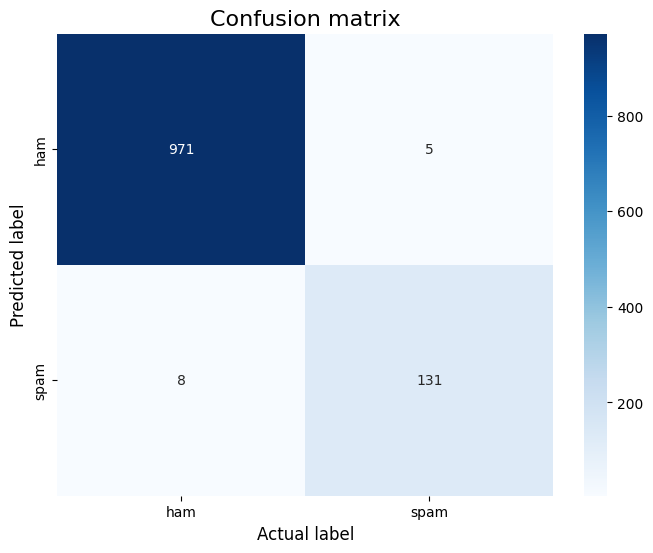

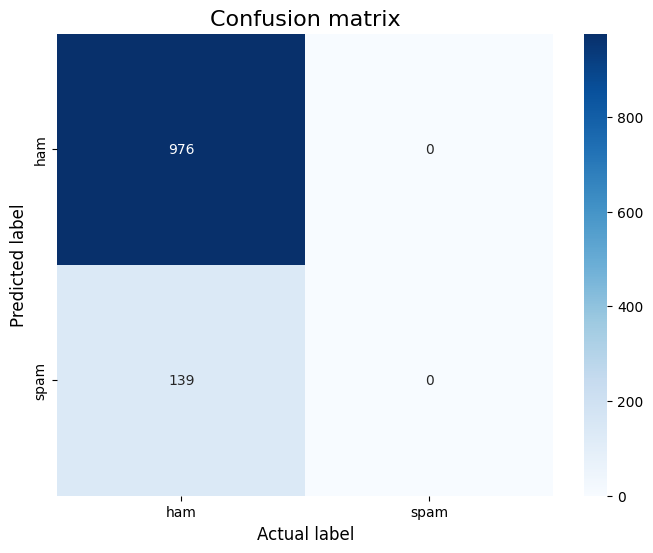

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''

    sentiment_classes = ['ham', 'spam']
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.argmax(np.array(y_test),axis=1), np.argmax(y_pred, axis=1))
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d',
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)

plot_confusion_matrix(model, X_test, y_test)
plot_confusion_matrix(model2, X_test, y_test)

In [ ]:
from keras.models import load_model

# Load model
#model = load_model('best_model.h5')

def predict_class(text):
    '''Function to predict sentiment class of the passed text'''

    sentiment_classes = ['ham', 'spam']
    max_len=100
    final_text=pre_text(text)
    #print(pro_text)
    # Transforms text to a sequence of integers using a tokenizer object
    xt = tokenizer.texts_to_sequences([final_text])
    # Pad sequences to the same length
    xt = pad_sequences(xt, padding='post', maxlen=max_len)
    # Do the prediction using the loaded model
    yt = model.predict(xt).argmax(axis=1)
    #print(yt)
    # Print the predicted sentiment
    print('The predicted sentiment is', sentiment_classes[yt[0]])

In [ ]:
print(df.loc[1,"v2"])


Ok lar... Joking wif u oni...


In [ ]:
predict_class("We are pleased to confirm that the issue has been resolved to the best of our ability, and we believe that the solution provided meets your expectations. Should you encounter any further concerns related to this matter or any other issues, please don't hesitate to reach out to us.")
predict_class("We hope this message finds you well. We're reaching out to inform you about some important updates regarding our security measures. In our ongoing commitment to ensuring the safety and privacy of our users, we've implemented additional layers of security to safeguard your information.These enhancements are designed to provide you with peace of mind and a secure experience while using our platform. Should you have any questions or concerns about these changes, please don't hesitate to reach out to our support team.Thank you for your continued trust and support.")
predict_class(df.loc[0,"v2"])
predict_class("exciting news! You have the chance to win big with our latest promotion! Simply participate in our contest for a chance to win fantastic prizes, including cash rewards, gift cards, and more. Don't miss out on this incredible opportunity!To enter the contest and increase your chances of winning, click the link below:Hurry, the contest ends soon! Good luck!")
predict_class("Urgent action is required! Your account needs immediate attention to avoid suspension. Please verify your account details by clicking the link below:Failure to verify your account may result in limited access or suspension. Don't risk losing access to your account – act now!If you have any questions or concerns, please contact our support team for assistance.Thank you for your prompt attention to this matter.")


1/1 [==============================] - 0s 156ms/step
The predicted sentiment is ham
1/1 [==============================] - 0s 18ms/step
The predicted sentiment is spam
1/1 [==============================] - 0s 19ms/step
The predicted sentiment is ham
1/1 [==============================] - 0s 18ms/step
The predicted sentiment is spam
1/1 [==============================] - 0s 18ms/step
The predicted sentiment is spam
